In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [64]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
dataset_nozero = dataset.copy(deep=True)
dataset_nozero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_nozero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dataset_nozero = dataset_nozero.dropna()
dataset_nozero.shape

(392, 9)

In [70]:
x=dataset_nozero.iloc[:,0:8].values
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(x)


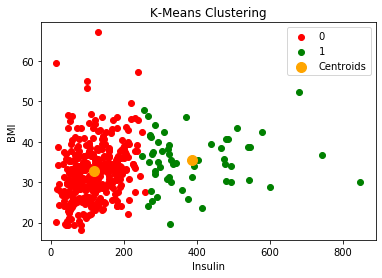

In [54]:
colors = 'rgbkcmy'

for i in np.unique(clusters):
    plt.scatter(x[clusters==i,4], x[clusters==i,5],
                color=colors[i], label=str(i))
plt.scatter(kmeans.cluster_centers_[:,4], kmeans.cluster_centers_[:,5],
            s=100, c='orange', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(dataset.columns[4])
plt.ylabel(dataset.columns[5])
plt.show()

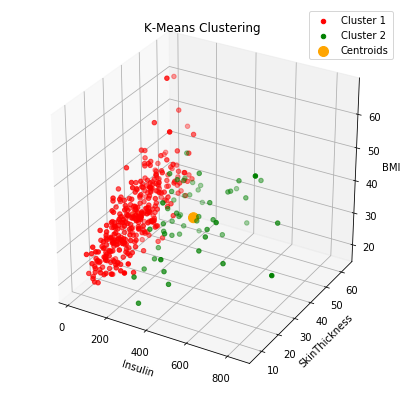

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    ax.scatter3D(x[clusters==i,4],
             x[clusters==i,3],
             x[clusters==i,5],
                 color=colors[i], label='Cluster ' + str(i + 1))
ax.scatter3D(kmeans.cluster_centers_[:,4],kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,5],
            s=100, c='orange', label='Centroids')

ax.set_xlabel(dataset.columns[4])
ax.set_ylabel(dataset.columns[3])
ax.set_zlabel(dataset.columns[5])

plt.legend()
plt.title('K-Means Clustering')
plt.show()